<a href="https://colab.research.google.com/github/Nonna-nna/Nonna-nna/blob/Machine-learning/ML_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

torch.Size([5])
184.87682
38.439518
20.898064
19.135178
17.316277
15.384674
13.650408
12.363505
11.618711
11.315479
11.22841
11.186518
11.150152
11.1251545
11.114335
11.112053
11.1119
11.1119
11.111899
11.111898
11.111898
11.111898
11.111898
11.111898
11.111898
11.111899
11.111899
11.111898
11.111898
11.111898
11.111898
173.28494
38.73544
21.09476
19.136166
17.196945
15.2012615
13.48408
12.285977
11.654998
11.43169
11.3708
11.332986
11.299035
11.276262
11.266782
11.264903
11.26479
11.26479
11.26479
11.264789
11.264789
11.264789
11.264789
11.26479
11.26479
11.264789
11.26479
11.264789
11.264789
11.264789
11.264791


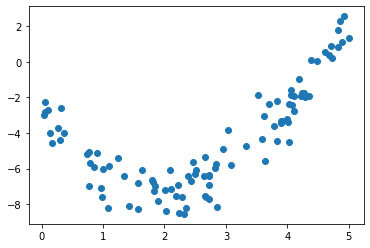

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as torchdist

normal_dist = torchdist.Normal(loc=torch.tensor(0.), scale=torch.tensor(1.))
X = normal_dist.sample([10])
X = normal_dist.sample([10, 5])
sample = normal_dist.sample()
log_likelihood = normal_dist.log_prob(sample)
samples = normal_dist.sample([5])
log_likelihood = normal_dist.log_prob(samples)

print(log_likelihood.shape) # -> (5,)

#推定したい関数
def toy_poly():
    x = 5 * torch.rand(100, 1) 
    linear_op = -3 - 4*x + 1*x**2 
    y = torchdist.Normal(linear_op, 1).sample()
    return x, y
x_train, y_train = toy_poly()
plt.plot(x_train.numpy(), y_train.numpy(), "o")

#目的関数
def log_joint_prob(w0, w1, w2, x, y):
    prior_w0 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
    prior_w1 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
    prior_w2 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
    linear = w0 + w1*x + w2*x**2
    likelihood = torchdist.Normal(linear, torch.ones_like(linear))
    return (
        prior_w0.log_prob(w0) +
        prior_w1.log_prob(w1) +
        prior_w2.log_prob(w2) +
        likelihood.log_prob(y).mean()
    )

#推定したいパラメーターの宣言
w0 = torch.nn.Parameter(torch.tensor(1.))
w1 = torch.nn.Parameter(torch.tensor(1.))
w2 = torch.nn.Parameter(torch.tensor(1.))

#自動微分の機能を使う
optimizer = torch.optim.Adam(params=[w0, w1, w2], lr=1e-3)
for i in range(30000):
    optimizer.zero_grad()
    log_joint_prob_value = log_joint_prob(w0, w1, w2, x_train, y_train)
    loss_value = - log_joint_prob_value
    loss_value.backward()
    optimizer.step()
    if (i+1) % 1000 == 0 or (i==0):
        print(loss_value.detach().numpy())

def toy_poly():
    x = 5 * torch.rand(100, 1) 
    linear_op = -3 - 4*x + 1*x**2 
    y = torchdist.Normal(linear_op, 1).sample()
    return x, y
x_train, y_train = toy_poly()

class MapRegression(torch.nn.Module):
    def __init__(self):
        super(MapRegression, self).__init__()
        
        self.prior_w0 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
        self.prior_w1 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
        self.prior_w2 = torchdist.Normal(torch.tensor(0.), 10*torch.tensor(1.))
        
        self.w0 = torch.nn.Parameter(torch.tensor(1.))
        self.w1 = torch.nn.Parameter(torch.tensor(1.))
        self.w2 = torch.nn.Parameter(torch.tensor(1.))
        
    def forward(self, x):
        return self.w0 + self.w1*x + self.w2*x**2
    
    def log_joint_prob(self, x, y):
        linear = self.forward(x)
        likelihood = torchdist.Normal(linear, torch.ones_like(linear))
        return (
            self.prior_w0.log_prob(self.w0) +
            self.prior_w1.log_prob(self.w1) +
            self.prior_w2.log_prob(self.w2) +
            likelihood.log_prob(y).mean()        
        )
        
model = MapRegression()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

for i in range(30000):
    optimizer.zero_grad()
    log_joint_prob_value = model.log_joint_prob(x_train, y_train)
    loss_value = - log_joint_prob_value
    loss_value.backward()
    optimizer.step()
    
    if (i+1) % 1000 == 0 or (i==0):
        print(loss_value.detach().numpy())

In [6]:
#from decimal import Decimal

print("w0 = ", w0, "w1 = ", w1, "w2 = ", w2)
print("w0 = ", int(w0), "w1 = ", int(w1), "w2 = ", int(w2))
#print("w0 = ", Decimal(w0), "w1 = ", Decimal(w1), "w2 = ", Decimal(w2))
print("w0 = ", float(w0), "w1 = ", float(w1), "w2 = ", float(w2))

w0 =  Parameter containing:
tensor(-2.9973, requires_grad=True) w1 =  Parameter containing:
tensor(-4.1206, requires_grad=True) w2 =  Parameter containing:
tensor(1.0447, requires_grad=True)
w0 =  -2 w1 =  -4 w2 =  1
w0 =  -2.9973013401031494 w1 =  -4.120550155639648 w2 =  1.0446594953536987


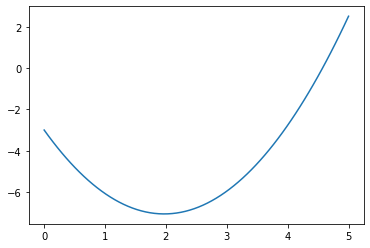

In [9]:
float_w0 = float(w0)
float_w1 = float(w1)
float_w2 = float(w2)

p = np.linspace( 0, 5, 70)   # linspace(min, max, N) で範囲 min から max を N 分割します
#q = p**5+p**4-10*p**3+2*p-8
#q = w0 + w1*p + w2*p**2
q = float_w0 + float_w1 * p + float_w2 * p * p
plt.plot(p, q)
plt.show()